In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os


In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


scanpy==1.7.1 anndata==0.7.6 umap==0.5.1 numpy==1.19.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0 leidenalg==0.8.3


In [3]:
datadir = "/Users/rejsmont/Google Drive/My Drive/Projects/RDN-WDP/sharing/"
counts = pd.read_csv(os.path.join(datadir, 'export', 'aerts_counts.csv'), index_col=0)
counts.index = counts.index.astype(str)
counts

,128up,14-3-3epsilon,14-3-3zeta,140up,18SrRNA-Psi:CR41602,18w,26-29-p,28SrRNA-Psi:CR40596,28SrRNA-Psi:CR40741,28SrRNA-Psi:CR41609,...,z,zetaCOP,zf30C,zfh1,zfh2,zip,zld,zormin,zuc,zyd
0,0,12,9,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,7,6,0,0,0,0,1,0,0,...,0,1,0,1,0,3,0,0,0,0
2,0,37,20,1,0,0,1,1,0,0,...,1,0,0,0,0,5,1,0,0,0
3,0,25,19,0,0,0,1,1,0,0,...,0,1,0,0,1,7,0,0,0,0
4,2,8,6,0,0,3,0,0,0,0,...,0,1,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,1,29,23,0,0,1,2,0,0,0,...,1,4,0,0,1,3,5,0,0,0
2378,1,37,19,1,0,0,16,0,0,0,...,0,1,1,6,0,18,0,0,0,0
2379,0,34,19,0,0,1,4,0,0,0,...,1,3,0,1,3,0,0,0,0,6
2380,4,88,77,1,0,3,17,1,0,0,...,0,9,3,0,0,85,8,2,0,0


In [4]:
genes = counts.columns.to_frame().rename(columns={0: 'gene_ids'})
genes

,gene_ids
128up,128up
14-3-3epsilon,14-3-3epsilon
14-3-3zeta,14-3-3zeta
140up,140up
18SrRNA-Psi:CR41602,18SrRNA-Psi:CR41602
...,...
zip,zip
zld,zld
zormin,zormin
zuc,zuc


In [5]:
cells = pd.read_csv(os.path.join(datadir, 'export', 'aerts_cells.csv'), index_col=0) \
          .iloc[:, 0].str.split("-", n = 1, expand = True) \
          .rename(columns={0: 'barcode', 1: 'replica'})
cells.index = cells.index.astype(str)
cells

,barcode,replica
0,AACCGCGGTTGAGTTC,1
1,AACGTTGCAATCACAC,1
2,AACTCCCGTTCTGGTA,1
3,AACTCCCTCCCAAGTA,1
4,AACTCCCTCTGCGTAA,1
...,...,...
2377,TTTGGTTCAAGAAAGG,2
2378,TTTGGTTTCTATCCTA,2
2379,TTTGTCACAGCGATCC,2
2380,TTTGTCAGTACCGGCT,2


In [6]:
clusters = pd.read_csv(os.path.join(datadir, 'export', 'clusters.csv'), index_col=0)
clusters

,0
1,R8 ato(+)
2,MF ato(+++)
3,peripodial
4,posterior
5,anterior
6,MF ato(+)
7,non-R8


In [7]:
adata = sc.AnnData(X = counts.values, obs = cells, var=genes)
adata.layers['raw'] = adata.X
imaging = pd.read_csv(os.path.join(datadir, 'export', 'aerts_clusters.csv'), index_col=0)
adata.obs['imaging'] = imaging['Cluster'].astype('str').astype('category').values
adata

AnnData object with n_obs × n_vars = 2382 × 11010
    obs: 'barcode', 'replica', 'imaging'
    var: 'gene_ids'
    layers: 'raw'

In [8]:
sc.pp.filter_cells(adata, min_genes=1000)
sc.pp.filter_genes(adata, min_cells=5)
adata

filtered out 10 cells that have less than 1000 genes expressed
filtered out 681 genes that are detected in less than 5 cells


AnnData object with n_obs × n_vars = 2372 × 10329
    obs: 'barcode', 'replica', 'imaging', 'n_genes'
    var: 'gene_ids', 'n_cells'
    layers: 'raw'

normalizing counts per cell
    finished (0:00:00)


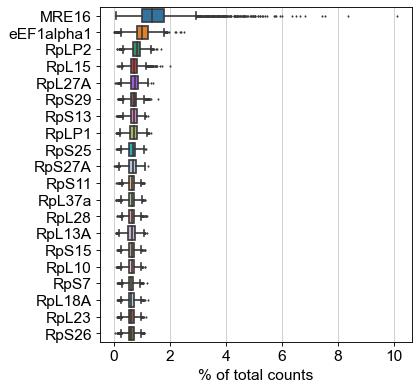

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [10]:
adata.var['mt'] = adata.var_names.str.startswith('mt:')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'barcode' as categorical
... storing 'replica' as categorical


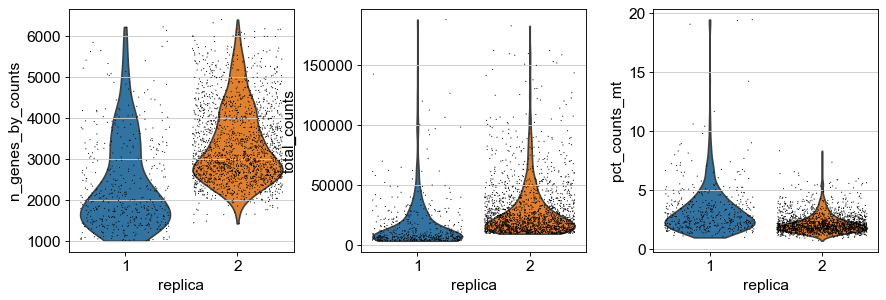

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], 'replica', jitter=0.4, multi_panel=True)

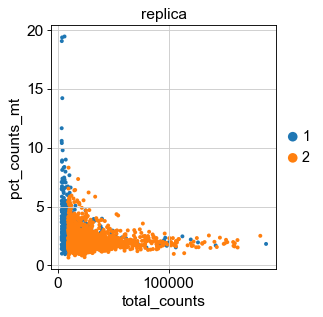

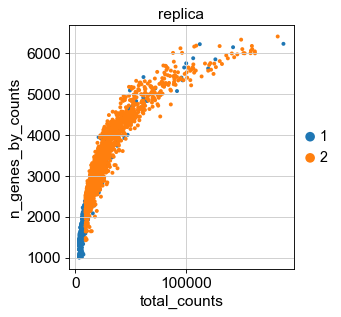

In [12]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color='replica')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='replica')

In [13]:
adata = adata[adata.obs.n_genes_by_counts < 5500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]
sc.pp.normalize_total(adata, target_sum=1, exclude_highly_expressed=True)
sc.pp.log1p(adata)

/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['CR43283', 'Hug', 'MRE16', 'noe', 'pncr002:3R', 'pros']
    finished (0:00:00)


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:144: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[: int(n_top_genes), 'highly_variable'] = True
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


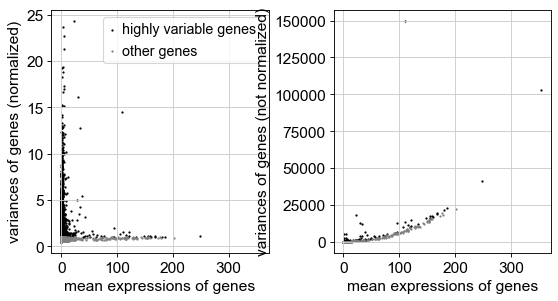

In [14]:
sc.pp.highly_variable_genes(adata, flavor='seurat_v3', layer='raw', n_top_genes=3000)
sc.pl.highly_variable_genes(adata)

In [15]:
adata_raw = adata
adata = adata[:, adata.var.highly_variable]
adata.raw = adata
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:08)


In [16]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


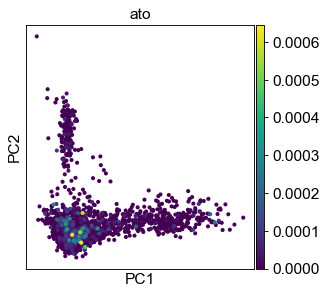

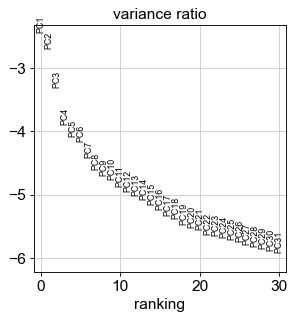

In [17]:
sc.pl.pca(adata, color='ato')
sc.pl.pca_variance_ratio(adata, log=True)

In [18]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=30)
sc.tl.umap(adata, n_components=3)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


In [19]:
adata

AnnData object with n_obs × n_vars = 2224 × 3000
    obs: 'barcode', 'replica', 'imaging', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'replica_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw'
    obsp: 'distances', 'connectivities'

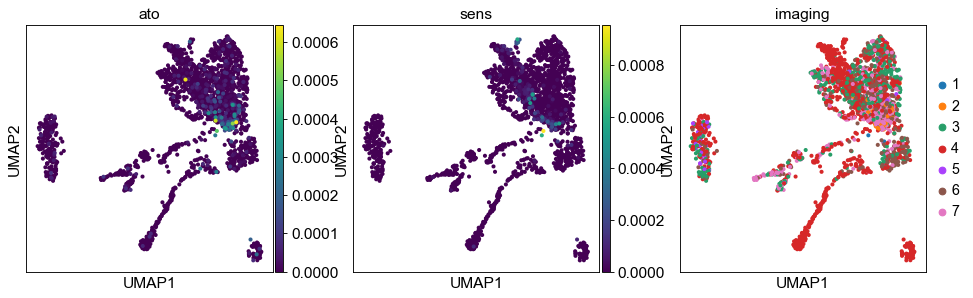

In [20]:
sc.pl.umap(adata, color=['ato', 'sens', 'imaging'])

In [21]:
for res in np.arange(0, 11, 1)/10:
    sc.tl.leiden(adata, res, key_added='leiden_' + str(res))
    sc.tl.louvain(adata, res, key_added='louvain_' + str(res))

running Leiden clustering
    finished: found 1 clusters and added
    'leiden_0.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 1 clusters and added
    'louvain_0.0', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 4 clusters and added
    'louvain_0.1', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden_0.2', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 5 clusters and added
    'louvain_0.2', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden c

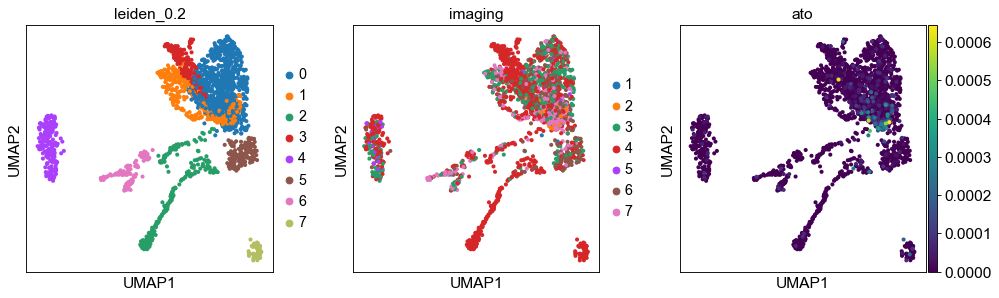

In [22]:
sc.pl.umap(adata, color=['leiden_0.2', 'imaging', 'ato'])

In [23]:
adata.raw.X

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.2917393e-04,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [9.0731752e-05, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 5.4426707e-04],
       [4.8090409e-05, 0.0000000e+00, 0.0000000e+00, ..., 1.2823596e-04,
        3.2060532e-05, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.8477093e-04,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

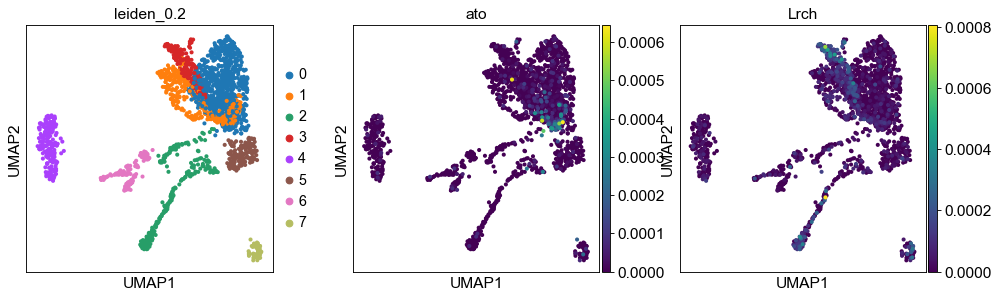

In [36]:
sc.set_figure_params(vector_friendly=False)
sc.pl.umap(adata, color=['leiden_0.2', 'ato', 'Lrch'], save='_genes_abdg.pdf')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_0.2']`
/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


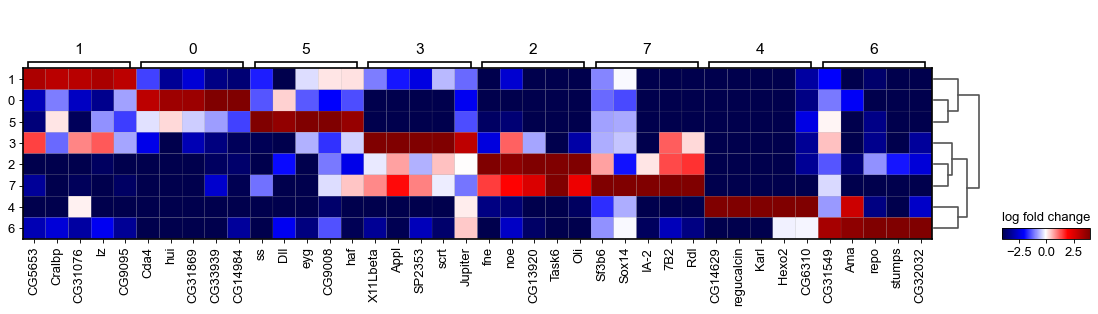

/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


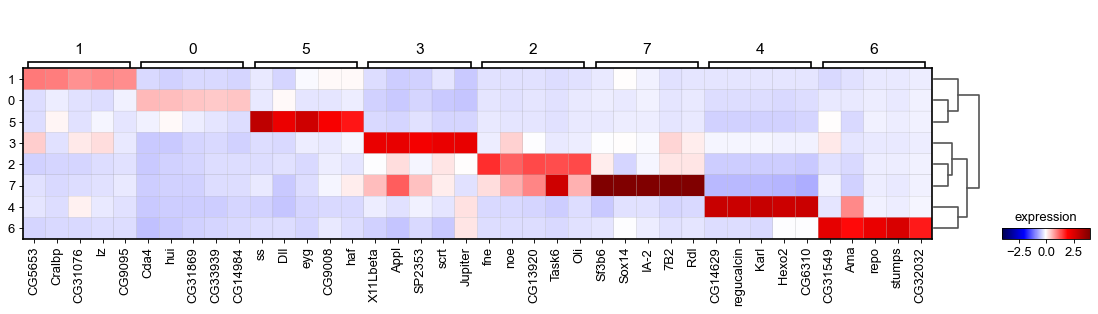

In [25]:
category = 'leiden_0.2'
sc.tl.rank_genes_groups(adata, category, method='wilcoxon', pts=True)
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, values_to_plot='logfoldchanges',
                                   cmap='seismic', vmin=-4, vmax=4, min_logfoldchange=3)
order = np.array(adata.uns['dendrogram_' + category]['dendrogram_info']['leaves']).astype(str).tolist()
markers = pd.concat([
    pd.DataFrame(adata.uns['rank_genes_groups']['names']).melt(var_name='cluster', value_name='gene'),
    pd.DataFrame(adata.uns['rank_genes_groups']['scores']).melt(var_name='cluster', value_name='score')['score'],
    pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges']).melt(var_name='cluster', value_name='l2fc')['l2fc']
], axis=1)
diff = markers[markers['l2fc'] > 3] \
    .sort_values('score', ascending=False).groupby('cluster') \
    .head(5).set_index(['cluster', 'score']).sort_index(ascending=False) \
    .loc[order, 'gene']
keys = dict(diff.groupby('cluster').apply(list))
mp = sc.pl.MatrixPlot(adata, keys, groupby=category, use_raw=False,
                      cmap='seismic', vmin=-4, vmax=4)
mp.add_dendrogram(dendrogram_key='dendrogram_' + category)
mp = mp.style(cmap='seismic').legend(title='expression')
mp.show()

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_imaging']`
/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


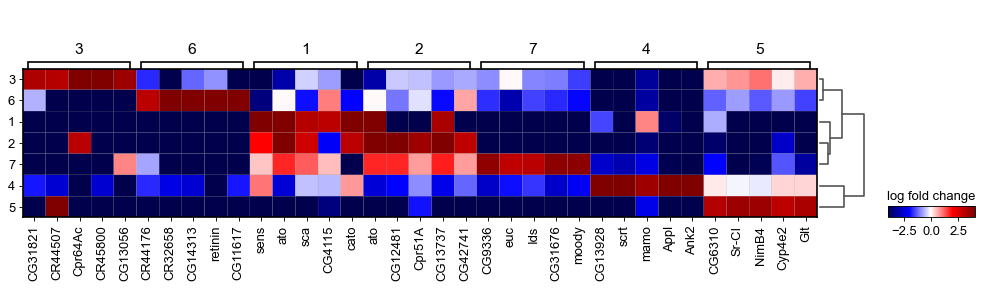

/usr/local/anaconda3/envs/rdn-wdp-new/lib/python3.8/site-packages/scanpy/plotting/_matrixplot.py:222: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  __ = ax.pcolor(_color_df, **kwds)


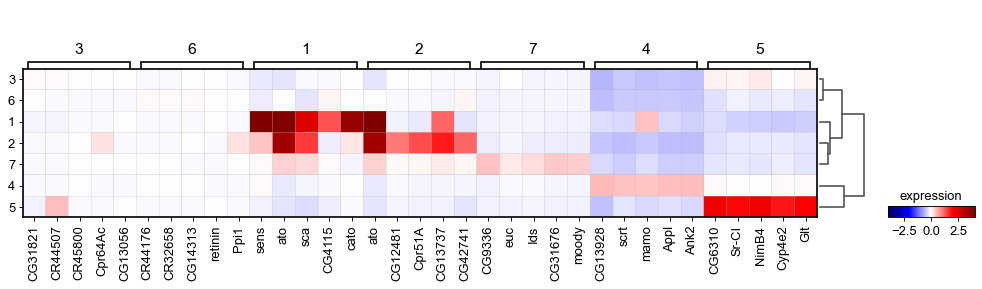

In [26]:
category = 'imaging'
sc.tl.rank_genes_groups(adata, category, method='wilcoxon', pts=True)
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, values_to_plot='logfoldchanges',
                                   cmap='seismic', vmin=-4, vmax=4, min_logfoldchange=3)
order = np.array(adata.uns['dendrogram_' + category]['dendrogram_info']['ivl']).astype(str).tolist()
markers = pd.concat([
    pd.DataFrame(adata.uns['rank_genes_groups']['names']).melt(var_name='cluster', value_name='gene'),
    pd.DataFrame(adata.uns['rank_genes_groups']['scores']).melt(var_name='cluster', value_name='score')['score'],
    pd.DataFrame(adata.uns['rank_genes_groups']['logfoldchanges']).melt(var_name='cluster', value_name='l2fc')['l2fc']
], axis=1)
diff = markers[markers['l2fc'] > 3] \
    .sort_values('score', ascending=False).groupby('cluster') \
    .head(5).set_index(['cluster', 'score']).sort_index(ascending=False) \
    .loc[order, 'gene']
keys = dict(diff.groupby('cluster').apply(list))
mp = sc.pl.MatrixPlot(adata, keys, groupby=category, use_raw=False,
                      cmap='seismic', vmin=-4, vmax=4)
mp.add_dendrogram(dendrogram_key='dendrogram_' + category)
mp = mp.style(cmap='seismic').legend(title='expression')
mp.show()

In [27]:
ato_targets = ['CG30492','phyl','CG6860','CG8965','E(spl)','neur','Abl','CG15097','CG32150','dap','HLHmdelta','nvy',
               'CG2556','sca','sens','dpr9','CG17724','Brd','DmsR-1','betaTub60D','CG13928','CG15863','CG30343',
               'CG9801','DAAM','n-syb','nerfin-1','salm','scrt','seq','spdo','SRPK','Victoria','CG1625','CG17378',
               'Fas2','sNPF','nmo','siz','beat-IIIc','Eip75B','king-tubby','lola','vn','CG31176','Mob1','Rapgap1',
               'CG32030','Dscam','hts','MYPT-75D','Pde8','spir','Teh1','Traf1','CG9924','mam','Mmp2','a','amon','br',
               'bru-3','CadN','CG32131','CG32169','CG9095','dpr10','Lim3','sano','alan-shepard','CG31871','Ank2',
               'cenG1A','Pka-R2','beat-IIIa','CG31637','CG32387','CG32677','CG33515','cup','dpr','f','kirre','side',
               'Spn','Src64B','CG6024','CG6495','CG8179','dpr8','CG32206']

imaged_genes = ['Abl','Brd','CG13928','CG15097','dila','CG17378','CG17724','CG2556','CG30343','CG31176','CG32150',
                'Lrch','rau','CG9801','DAAM','Fas2','E(spl)mdelta-HLH','SRPK','Victoria','vn','ato','beat-IIIc',
                'betaTub60D','dap','dpr9','ktub','lola','nSyb','nmo','nvy','phyl','sNPF','sca','scrt','sens','seq',
                'siz','spdo']

In [28]:
adata.uns['pca']

{'params': {'zero_center': True, 'use_highly_variable': True},
 'variance': array([184.19724  , 144.10184  ,  77.6541   ,  43.24239  ,  35.77674  ,
         33.24459  ,  25.694128 ,  21.229359 ,  19.136261 ,  18.084312 ,
         16.317287 ,  14.958902 ,  14.0904665,  13.147647 ,  12.134456 ,
         11.210502 ,  10.248986 ,   9.758719 ,   8.936105 ,   8.481887 ,
          8.14529  ,   7.6310406,   7.4833593,   7.2102027,   7.048738 ,
          6.8183594,   6.4788523,   6.234717 ,   6.024873 ,   5.919076 ,
          5.6643343,   5.570674 ,   5.523271 ,   5.4054594,   5.1679664,
          4.972896 ,   4.9204392,   4.8236804,   4.6513624,   4.583031 ,
          4.478697 ,   4.414223 ,   4.322826 ,   4.2399197,   4.143392 ,
          4.1098104,   4.0799446,   4.0192566,   3.9643261,   3.9509888],
       dtype=float32),
 'variance_ratio': array([0.08680025, 0.06790588, 0.03659336, 0.02037734, 0.01685927,
        0.01566603, 0.01210798, 0.01000402, 0.00901768, 0.00852197,
        0.0076892

In [29]:
adata_t = sc.AnnData(X = sct_counts.values, obs = cells, var=genes.loc[sct_genes])
adata_t.layers['raw'] = counts[sct_genes].values
adata_t.layers['norm'] = sct_norm.values
adata_t.layers['counts'] = sct_counts.values
adata_t.layers['scaled'] = sct_scaled.values
adata_t.var['mt'] = adata_t.var_names.str.startswith('mt:')
sc.pp.calculate_qc_metrics(adata_t, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

NameError: name 'sct_counts' is not defined

In [ ]:
adata_t.var['highly_variable'] = adata_t.var['gene_ids'].isin(imaged_genes)

In [ ]:
adata_t.layers['raw'] = adata_t.X
sc.pp.normalize_total(adata_t, inplace=True)
sc.pp.log1p(adata_t)

In [ ]:
sc.tl.pca(adata_t, svd_solver='arpack')

In [ ]:
sc.pl.pca(adata_t, color='ato')

In [ ]:
sc.pp.neighbors(adata_t, n_neighbors=10, n_pcs=30)

In [ ]:
sc.tl.umap(adata_t)

In [ ]:
sc.pl.umap(adata_t, color=['ato', 'sens', 'nSyb', 'sca'])

In [ ]:
adata_t.obs['imaging'] = imaging['Cluster'].astype('category').values

In [ ]:
sc.pl.umap(adata_t, color=['imaging'])

In [ ]:
for res in np.arange(0, 11, 1)/10:
    sc.tl.leiden(adata_t, res, key_added='leiden_' + str(res))

In [ ]:
sc.pl.umap(adata_t, color=['leiden_0.1', 'leiden_0.5', 'imaging', 'ato'])

In [ ]:
len(imaged_genes)